<a href="https://colab.research.google.com/github/mmaithani/Loan-Approvel-ML-model-with-insights/blob/master/assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Find % of total applicants for each unique value of dependents
2. Find the average number of dependents per applicant=
3. Find the %of applications approved for self employed applicants
4. What is the % of rejections for married male applicants
5. Which property area has the maximum approval ratio
6. Find average dependents per income group=?
7. Create a simple predictive model to assess whether a loan application will be approved or rejected and provide the accuracy score



In [0]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

# Importing Data

In [0]:
data=pd.read_json("/content/loan_data.json")
data7=pd.read_json("/content/loan_data.json")

In [0]:
data.tail()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
506,LP002978,Female,No,0,Graduate,No,1,Rural,low,Y
507,LP002979,Male,Yes,3+,Graduate,No,1,Rural,medium,Y
508,LP002983,Male,Yes,1,Graduate,No,1,Urban,medium,Y
509,LP002984,Male,Yes,2,Graduate,No,1,Urban,medium,Y
510,LP002990,Female,No,0,Graduate,Yes,0,Semiurban,medium,N


## Plotting different features with respect to Application status(Approvel ratio)
# data insights

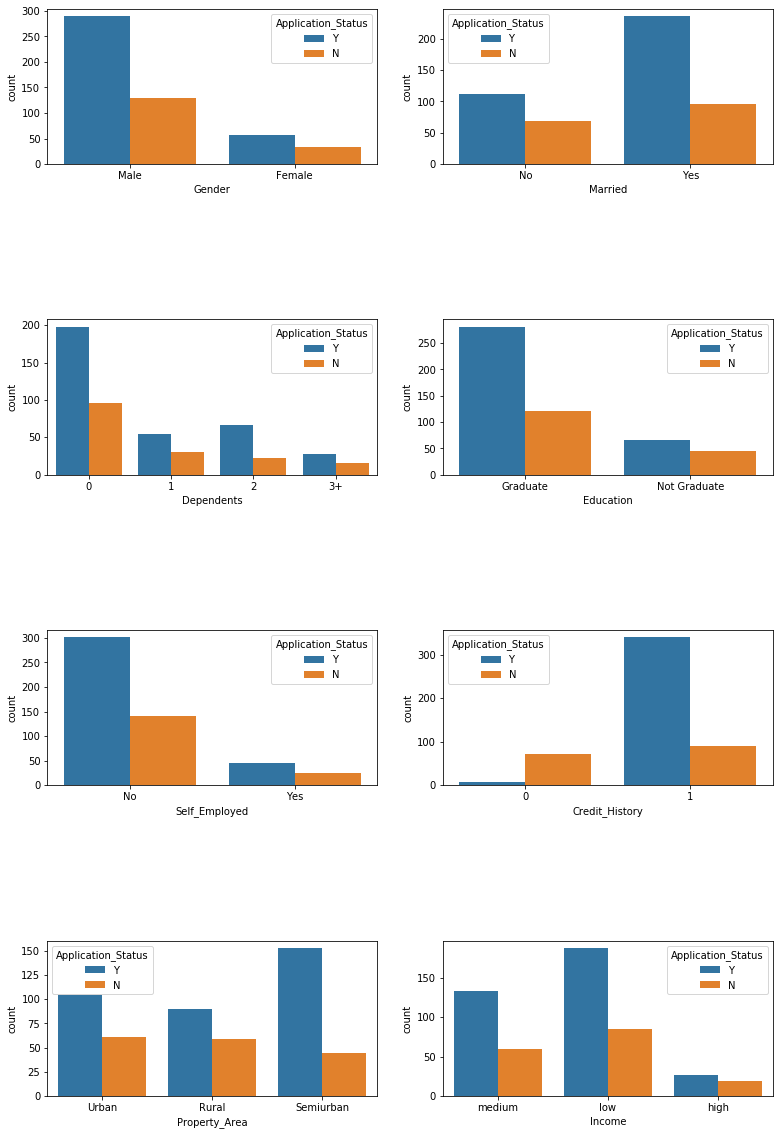

In [0]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(4,2,figsize=(13,20))
for id,i in enumerate(data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area', 'Income']]):
    row,col = id//2,id%2
    sb.countplot(x=i,data=data,hue='Application_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

# Ques 1. Find % of total applicants for each unique value of dependents
**Answer=>** 
#57.5 % applicats are with 0 -dependents
#16.6 % applicats are with 1 -dependents
#17.2 % applicats are with 2 -dependents
#8.6 % of applicats are  with more than 3 dependents(3+)

*1-Approach using groupby count* 

In [0]:
l=data7.groupby(data.Dependents)
l.count()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
Dependents,,,,,,,,,
0,294,294,294,294,294,294,294,294,294
1,85,85,85,85,85,85,85,85,85
2,88,88,88,88,88,88,88,88,88
3+,44,44,44,44,44,44,44,44,44


In [0]:
print((294/511*100),"% total applicats are with 0 -dependents")
print((85/511*100),"% total applicats are with 1 -dependents")    
print((88/511*100),"% total applicats are with 2 -dependents")
print(44/511*100,"% total applicats are with 3+ -dependents")

57.534246575342465 % total applicats are with 0 -dependents
16.634050880626223 % total applicats are with 1 -dependents
17.22113502935421 % total applicats are with 2 -dependents
8.610567514677104 % total applicats are with 3+ -dependents


# ======================================================================

# ======================================================================

# 3. Find the %of applications approved for self employed applicants
# Answer= 9%
# 46-SELF EMPLOYED candidates GETS THEIR loan APPROVED

In [0]:
# data7.groupby(data.Application_Status).count()
data.groupby(['Self_Employed','Application_Status']).count()

Application_ID  Gender  ...  Property_Area  Income
Self_Employed Application_Status                          ...                       
No            N                              140     140  ...            140     140
              Y                              301     301  ...            301     301
Yes           N                               24      24  ...             24      24
              Y                               46      46  ...             46      46

[4 rows x 8 columns]

In [0]:
print(46/511*100)

9.001956947162427


# ======================================================================

# 4. What is the % of rejections for married male applicant
# Ans= 17% of married males are rejected for Loan approval

In [0]:
data.groupby(['Married','Gender','Application_Status']).count()

Application_ID  ...  Income
Married Gender Application_Status                  ...        
No      Female N                               26  ...      26
               Y                               40  ...      40
        Male   N                               43  ...      43
               Y                               71  ...      71
Yes     Female N                                8  ...       8
               Y                               17  ...      17
        Male   N                               87  ...      87
               Y                              219  ...     219

[8 rows x 7 columns]

In [0]:
print(87/511*100)

17.025440313111545


# ======================================================================

#5. Which property area has the maximum approval ratio
# Ans= Semiurban

In [0]:
data.groupby(['Property_Area','Application_Status']).count()

Application_ID  ...  Income
Property_Area Application_Status                  ...        
Rural         N                               59  ...      59
              Y                               90  ...      90
Semiurban     N                               44  ...      44
              Y                              153  ...     153
Urban         N                               61  ...      61
              Y                              104  ...     104

[6 rows x 8 columns]

# ======================================================================

# 2. Find the average number of dependents per applicant


In [0]:
data7.groupby(['Dependents']).count()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
Dependents,,,,,,,,
0,294,294,294,294,294,294,294,294
1,85,85,85,85,85,85,85,85
2,88,88,88,88,88,88,88,88
3,44,44,44,44,44,44,44,44


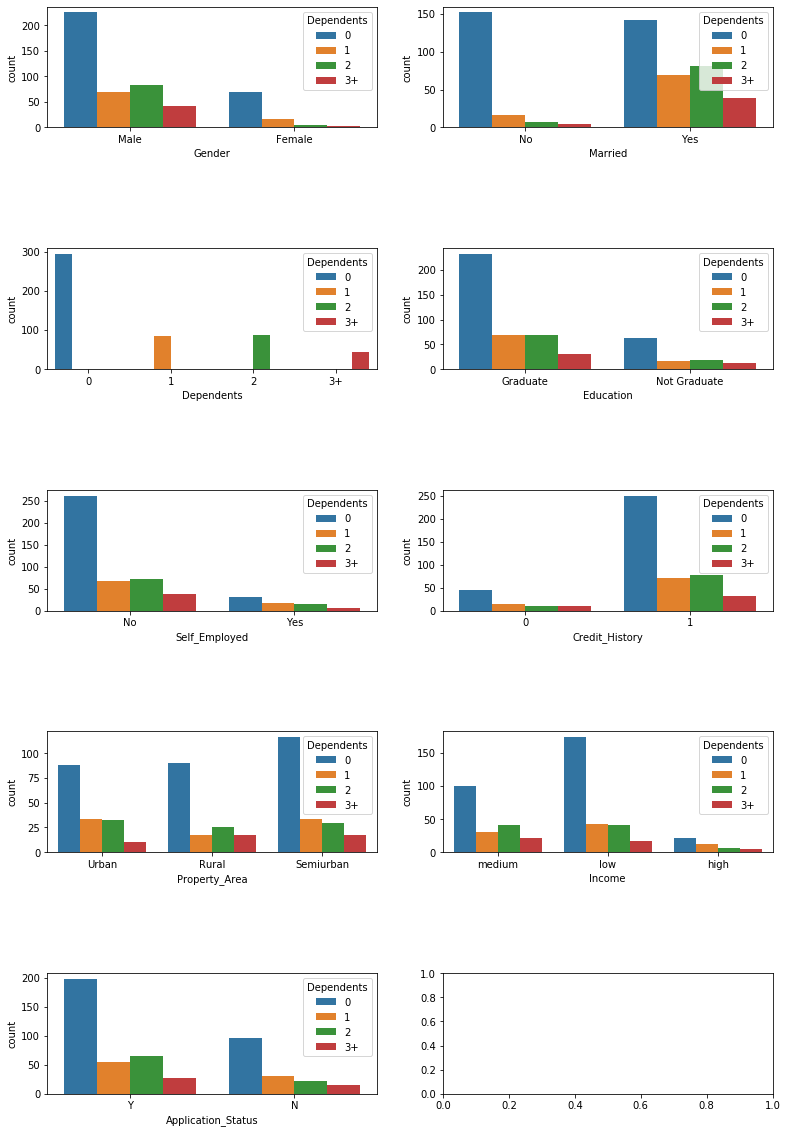

In [0]:
fig,axes = plt.subplots(5,2,figsize=(13,20))
for id,i in enumerate(data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area', 'Income','Application_Status']]):
    row,col = id//2,id%2
    sb.countplot(x=i,data=data,hue='Dependents',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

#6. Find average dependents per income group

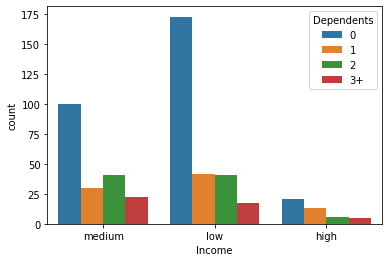

In [0]:
sb.countplot(hue=data.Dependents,x=data.Income)

In [0]:
data.groupby(['Income','Dependents']).count()
Average no. of dependents in high income candidates is 

Application_ID  Gender  ...  Property_Area  Application_Status
Income Dependents                          ...                                   
high   0                       21      21  ...             21                  21
       1                       13      13  ...             13                  13
       2                        6       6  ...              6                   6
       3+                       5       5  ...              5                   5
low    0                      173     173  ...            173                 173
       1                       42      42  ...             42                  42
       2                       41      41  ...             41                  41
       3+                      17      17  ...             17                  17
medium 0                      100     100  ...            100                 100
       1                       30      30  ...             30                  30
       2                       41      41  ...             41                  41
       3+                      22      22  ...             22                  22

[12 rows x 8 columns]

In [421]:
data.groupby(['Income']).count() 

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Application_Status
Income,,,,,,,,,
high,45,45,45,45,45,45,45,45,45
low,273,273,273,273,273,273,273,273,273
medium,193,193,193,193,193,193,193,193,193


In [422]:
21+13+6+5

45

# ======================================================================

# 7.) Create a simple predictive model to assess whether a loan application will be approved or rejected and provide the accuracy score

In [0]:
data7.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


In [0]:
data7.drop(['Application_ID'],axis=1,inplace=True)

In [0]:
from sklearn.preprocessing import LabelEncoder
column=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Income','Application_Status']
all= LabelEncoder()
for i in column:
    data7[i] = all.fit_transform(data7[i])

In [0]:
data7.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,1,0,0,0,0,1,2,2,1
1,1,1,1,0,0,1,0,2,0
2,1,1,0,0,1,1,2,1,1
3,1,1,0,1,0,1,2,1,1
4,1,0,0,0,0,1,2,2,1


In [0]:
data7.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Income', 'Application_Status'],
      dtype='object')

In [0]:
x=data7[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area', 'Income']]
y=data7.Application_Status
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.2, random_state=7)

In [0]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.883495145631068


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# best performing model is l.r

# accuracy=89 %

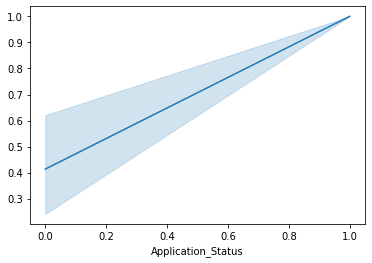

In [0]:
sb.lineplot(x=y_test,y=predictions)

# 12 applicationn are wrongly accepted
# they should not be accepted
## we need to derease false neegative 

In [0]:
from sklearn.metrics import confusion_matrix #confusuon matrix
pd.crosstab(y_test, predictions)
#positive=1 : application accepted

col_0,0,1
Application_Status,,
0,17,12
1,0,74


# -------------------------------------------------------------------------------------------------

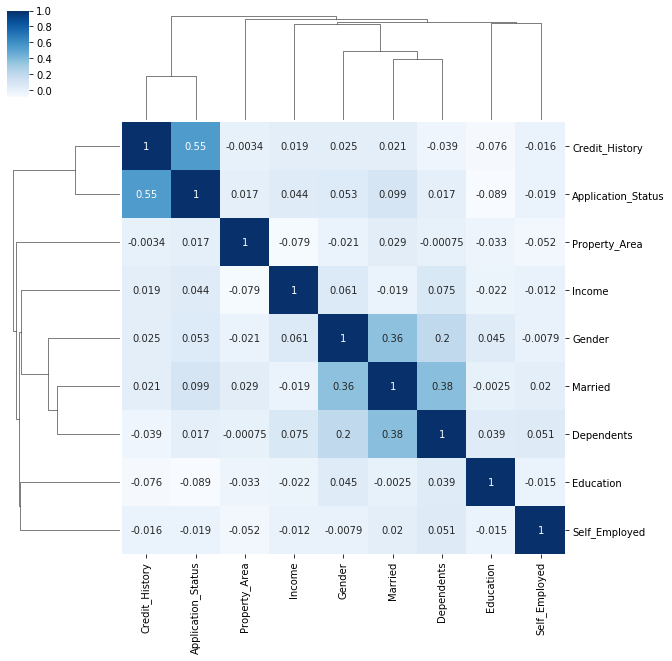

In [0]:
sb.clustermap(data7.corr(),cmap='Blues',annot=True)
#credit history is correlated with application status

# other models

In [0]:
X_train=data7[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area', 'Income']]
Y_train=data7.Application_Status

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=10)

In [0]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, Y_train)
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier2.fit(X_train, Y_train)
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'linear', random_state = 0)
classifier3.fit(X_train, Y_train)
# Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier4 = SVC(kernel = 'rbf', random_state = 1)
classifier4.fit(X_train, Y_train)
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train, Y_train)
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier6.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
Y_pred1 = classifier1.predict(X_test)
Y_pred2 = classifier2.predict(X_test)
Y_pred3 = classifier3.predict(X_test)
Y_pred4 = classifier4.predict(X_test)
Y_pred5= classifier5.predict(X_test)
Y_pred6 = classifier6.predict(X_test)

In [0]:

print(accuracy_score(Y_test, Y_pred1))
print(accuracy_score(Y_test, Y_pred2))
print(accuracy_score(Y_test, Y_pred3))
print(accuracy_score(Y_test, Y_pred4))
print(accuracy_score(Y_test, Y_pred5))
print(accuracy_score(Y_test, Y_pred6))

0.8376623376623377
0.7727272727272727
0.8376623376623377
0.8376623376623377
0.8311688311688312
0.7337662337662337
